In [28]:
import pandas as pd

In [29]:
df = pd.read_csv('car_sales_data.csv')

In [30]:
df.head()

,sale_id,model,date,customer_name,price
0,1,Toyota Camry,2024-05-29,David Kim,28860
1,2,Tesla Model 3,2024-05-08,Ngozi Uche,46772
2,3,Hyundai Elantra,2024-02-24,David Kim,23092
3,4,Ford Mustang,2024-04-29,Mary Johnson,33466
4,5,Honda Accord,2024-05-19,Linda Park,30426


In [31]:
df.dtypes

sale_id           int64
model            object
date             object
customer_name    object
price             int64
dtype: object

In [32]:
df.describe()

,sale_id,price
count,100.000000,100.000000
mean,50.500000,33242.540000
std,29.011492,7876.746107
min,1.000000,20189.000000
25%,25.750000,28058.250000
50%,50.500000,31721.500000
75%,75.250000,37361.500000
max,100.000000,47875.000000


In [33]:
df.isnull().sum()

sale_id          0
model            0
date             0
customer_name    0
price            0
dtype: int64

In [34]:
df.shape, df.size

((100, 5), 500)

In [35]:
total_sales = len(df)
print(f'total sales : {total_sales}')

total sales : 100


In [36]:
avg_price = df['price'].mean()
print(f'average sale price : {avg_price}')

average sale price : 33242.54


In [37]:
total_revenue = df['price'].sum()
print(f'total revenue : {total_revenue}')

total revenue : 3324254


In [38]:
sales_per_model = df.groupby('model').size().sort_values(ascending=False)
sales_per_model

model
Toyota Camry       25
Tesla Model 3      24
Honda Accord       18
Ford Mustang       17
Hyundai Elantra    16
dtype: int64

In [39]:
avg_price_per_model = df.groupby('model')['price'].size().mean()
avg_price_per_model

np.float64(20.0)

In [40]:
revenue_per_customer = df.groupby('customer_name')['price'].sum().sort_values(ascending=False)
revenue_per_customer

customer_name
Carlos Diaz     496024
David Kim       468928
Ngozi Uche      451281
Ali Bello       428382
Emma Okafor     391844
Linda Park      369183
Mary Johnson    360328
John Smith      358284
Name: price, dtype: int64

In [41]:
df['date'] = pd.to_datetime(df['date'])

In [42]:
df['month'] = df['date'].dt.to_period('M')

In [43]:
monthly_sales = df.groupby('month').size()

In [44]:
monthly_sales

month
2024-01    14
2024-02    20
2024-03    18
2024-04    18
2024-05    14
2024-06    16
Freq: M, dtype: int64

In [45]:
monthly_revenue = df.groupby('month')['price'].sum()
monthly_revenue

month
2024-01    459344
2024-02    646375
2024-03    578119
2024-04    635174
2024-05    450772
2024-06    554470
Freq: M, Name: price, dtype: int64

In [46]:
df.head()

,sale_id,model,date,customer_name,price,month
0,1,Toyota Camry,2024-05-29,David Kim,28860,2024-05
1,2,Tesla Model 3,2024-05-08,Ngozi Uche,46772,2024-05
2,3,Hyundai Elantra,2024-02-24,David Kim,23092,2024-02
3,4,Ford Mustang,2024-04-29,Mary Johnson,33466,2024-04
4,5,Honda Accord,2024-05-19,Linda Park,30426,2024-05


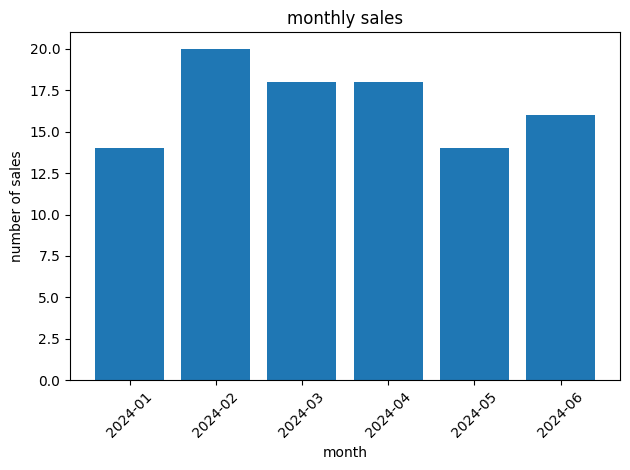

In [53]:
import matplotlib.pyplot as plt
plt.bar(monthly_sales.index.astype(str), monthly_sales.values)
plt.title('monthly sales')
plt.ylabel('number of sales')
plt.xlabel('month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('bar_chart.png', dpi=300)
plt.show()

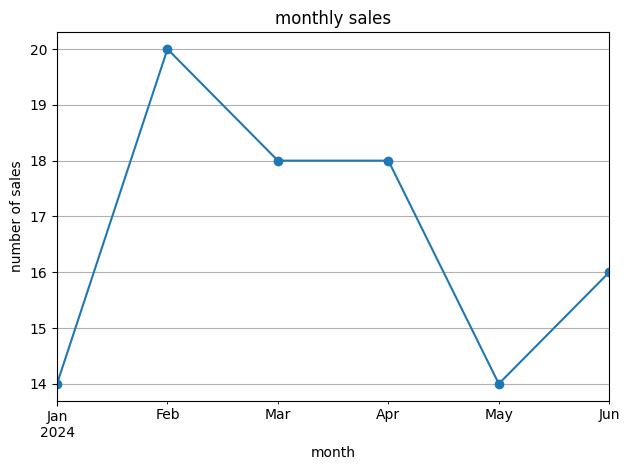

In [57]:
monthly_sales.plot(kind='line', marker='o')
plt.title('monthly sales')
plt.ylabel('number of sales')
plt.xlabel('month')
plt.grid(True)
plt.tight_layout()
plt.savefig('line of sales distribution', dpi=300)
plt.show()

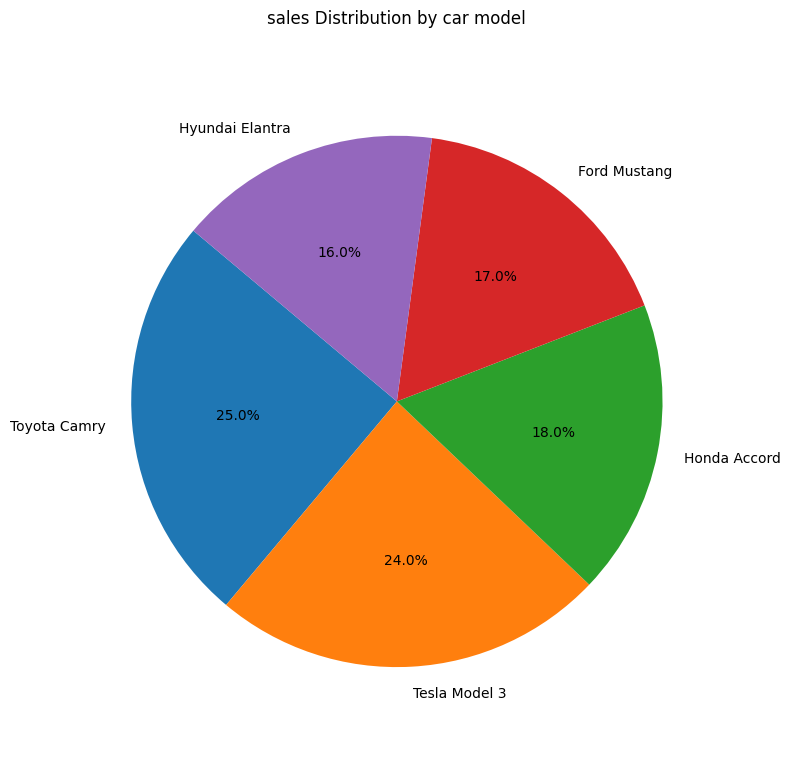

In [58]:
plt.figure(figsize=(8,8))
plt.pie(sales_per_model, labels=sales_per_model.index, autopct='%1.1f%%', startangle=140)
plt.title('sales Distribution by car model')
plt.axis('equal') 
plt.tight_layout()
plt.savefig('pie chart of sales model', dpi=300)
plt.show()